In [4]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import pandas as pd
import os
import glob

# 📂 Path to raw pickle files folder (adjust if needed)
DIR_OUTPUT = "dfraud_transaction_detection\notebooks\simulated-data-raw"

# 📦 Get all .pkl files in the folder
file_pattern = os.path.join(DIR_OUTPUT, '*.pkl')
file_list = sorted(glob.glob(file_pattern))  # Optional sort by name

# 🧺 Store DataFrames temporarily
dfs = []

# 🔁 Load and combine all pickle DataFrames
if file_list:
    for file in file_list:
        df = pd.read_pickle(file)
        if isinstance(df, pd.DataFrame):
            dfs.append(df)
        else:
            print(f"⚠️ Skipped: {file} is not a DataFrame")

    # 🧩 Combine into one full DataFrame
    transactions_df = pd.concat(dfs, ignore_index=True)
    print(f"✅ Loaded and combined {len(dfs)} DataFrames.")

    # 👀 Show the top of the data
    display(transactions_df.head())
else:
    print("⚠️ No pickle files found in the directory.")



⚠️ No pickle files found in the directory.


In [13]:
transactions_df.head()

NameError: name 'transactions_df' is not defined

In [ ]:
transactions_df.shape

(1754155, 9)

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


In [ ]:
transactions_df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [ ]:
unique_counts = transactions_df.nunique()
print(unique_counts)

TRANSACTION_ID       1754155
TX_DATETIME          1635076
CUSTOMER_ID             4990
TERMINAL_ID            10000
TX_AMOUNT              24585
TX_TIME_SECONDS      1635076
TX_TIME_DAYS             183
TX_FRAUD                   2
TX_FRAUD_SCENARIO          4
dtype: int64


In [ ]:
unique_fraud_values = transactions_df['TX_FRAUD'].unique()
print("unique values of fraud_values are {} ".format(unique_fraud_values))

unique_fraud_Scenario = transactions_df['TX_FRAUD_SCENARIO'].unique()
print("unique values of TX_FRAUD_SCENARIO are {} ".format(unique_fraud_Scenario))

unique values of fraud_values are [0 1] 
unique values of TX_FRAUD_SCENARIO are [0 1 3 2] 


In [ ]:
fraudulent_count = (transactions_df['TX_FRAUD'] == 1).sum()
non_fraudulent_count = (transactions_df['TX_FRAUD'] == 0).sum()

print(f"Number of fraudulent transactions (TX_FRAUD = 1): {fraudulent_count}")
print(f"Number of non-fraudulent transactions (TX_FRAUD = 0): {non_fraudulent_count}")

Number of fraudulent transactions (TX_FRAUD = 1): 14681
Number of non-fraudulent transactions (TX_FRAUD = 0): 1739474


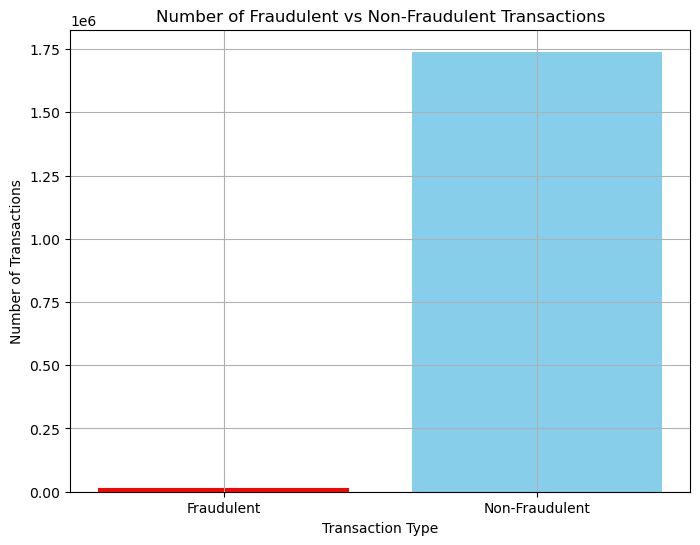

In [ ]:
categories = ['Fraudulent', 'Non-Fraudulent']
counts = [fraudulent_count, non_fraudulent_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['red', 'skyblue'])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.grid(True)
plt.show()

In [ ]:
fraudulent_count_Scenario0 = ((transactions_df['TX_FRAUD'] == 1) & (transactions_df['TX_FRAUD_SCENARIO'] == 0)).sum()
fraudulent_count_Scenario1 = ((transactions_df['TX_FRAUD'] == 1) & (transactions_df['TX_FRAUD_SCENARIO'] == 1)).sum()
fraudulent_count_Scenario2 = ((transactions_df['TX_FRAUD'] == 1) & (transactions_df['TX_FRAUD_SCENARIO'] == 2)).sum()
fraudulent_count_Scenario3 = ((transactions_df['TX_FRAUD'] == 1) & (transactions_df['TX_FRAUD_SCENARIO'] == 3)).sum()

print(f"Number of fraudulent transactions in Scenario 0: {fraudulent_count_Scenario0}")
print(f"Number of fraudulent transactions in Scenario 1: {fraudulent_count_Scenario1}")
print(f"Number of fraudulent transactions in Scenario 2: {fraudulent_count_Scenario2}")
print(f"Number of fraudulent transactions in Scenario 3: {fraudulent_count_Scenario3}")

Number of fraudulent transactions in Scenario 0: 0
Number of fraudulent transactions in Scenario 1: 973
Number of fraudulent transactions in Scenario 2: 9077
Number of fraudulent transactions in Scenario 3: 4631


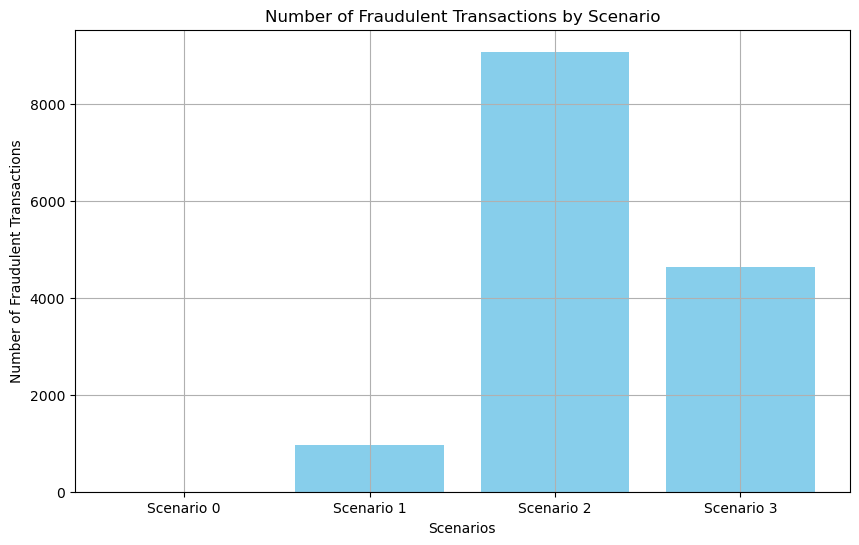

In [ ]:
scenarios = ['Scenario 0', 'Scenario 1', 'Scenario 2', 'Scenario 3']
fraudulent_counts = [fraudulent_count_Scenario0, fraudulent_count_Scenario1, fraudulent_count_Scenario2, fraudulent_count_Scenario3]

plt.figure(figsize=(10, 6))
plt.bar(scenarios, fraudulent_counts, color='skyblue')
plt.xlabel('Scenarios')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Scenario')
plt.grid(True)
plt.show()

In [ ]:
transactions_df.describe()

,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,5.363230e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,2.101000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,4.464000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,7.695000e+01,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,2.628000e+03,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,4.232649e+01,9.110012e-02,2.113263e-01


In [ ]:
transactions_df.head(2)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0


In [ ]:
fraudulent_transactions = transactions_df[transactions_df['TX_FRAUD'] == 1]

min_fraud_amount = fraudulent_transactions['TX_AMOUNT'].min()
max_fraud_amount = fraudulent_transactions['TX_AMOUNT'].max()
avg_fraud_amount = fraudulent_transactions['TX_AMOUNT'].mean()

print("\nFraudulent Transactions (TX_FRAUD = 1):")
print(f"Minimum Amount of Fraud (TX_FRAUD = 1): {min_fraud_amount}")
print(f"Maximum Amount of Fraud (TX_FRAUD = 1): {max_fraud_amount}")
print(f"Average Amount of Fraud (TX_FRAUD = 1): {avg_fraud_amount}\n")

fraudulent_transactions = transactions_df[transactions_df['TX_FRAUD'] == 0]

min_amount_overall = transactions_df['TX_AMOUNT'].min()
max_amount_overall = transactions_df['TX_AMOUNT'].max()
avg_amount_overall = transactions_df['TX_AMOUNT'].mean()

print("Overall Transactions:")
print(f"Minimum Amount: {min_amount_overall}")
print(f"Maximum Amount: {max_amount_overall}")
print(f"Average Amount: {avg_amount_overall}")


Fraudulent Transactions (TX_FRAUD = 1):
Minimum Amount of Fraud (TX_FRAUD = 1): 0.02
Maximum Amount of Fraud (TX_FRAUD = 1): 2628.0
Average Amount of Fraud (TX_FRAUD = 1): 131.16802397656835

Overall Transactions:
Minimum Amount: 0.0
Maximum Amount: 2628.0
Average Amount: 53.632301638110654


In [ ]:
transactions_df['TX_HOUR'] = transactions_df['TX_DATETIME'].dt.hour
transactions_df['TX_DAY'] = transactions_df['TX_DATETIME'].dt.day
transactions_df['TX_DATE'] = transactions_df['TX_DATETIME'].dt.date

In [ ]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_HOUR,TX_DAY,TX_DATE
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,0,1,2018-04-01
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,0,1,2018-04-01
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,0,1,2018-04-01
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,0,1,2018-04-01
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,0,1,2018-04-01


In [ ]:
fraud_counts_by_date = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby('TX_DATE').size()
total_counts_by_date = transactions_df.groupby('TX_DATE').size()
fraud_rate_by_date = fraud_counts_by_date / total_counts_by_date

In [ ]:
fraud_counts_by_hour = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby('TX_HOUR').size()
total_counts_by_hour = transactions_df.groupby('TX_HOUR').size()
fraud_rate_by_hour = fraud_counts_by_hour / total_counts_by_hour

In [ ]:
fraud_counts_by_day = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby('TX_DAY').size()
total_counts_by_day = transactions_df.groupby('TX_DAY').size()
fraud_rate_by_day = fraud_counts_by_day / total_counts_by_day

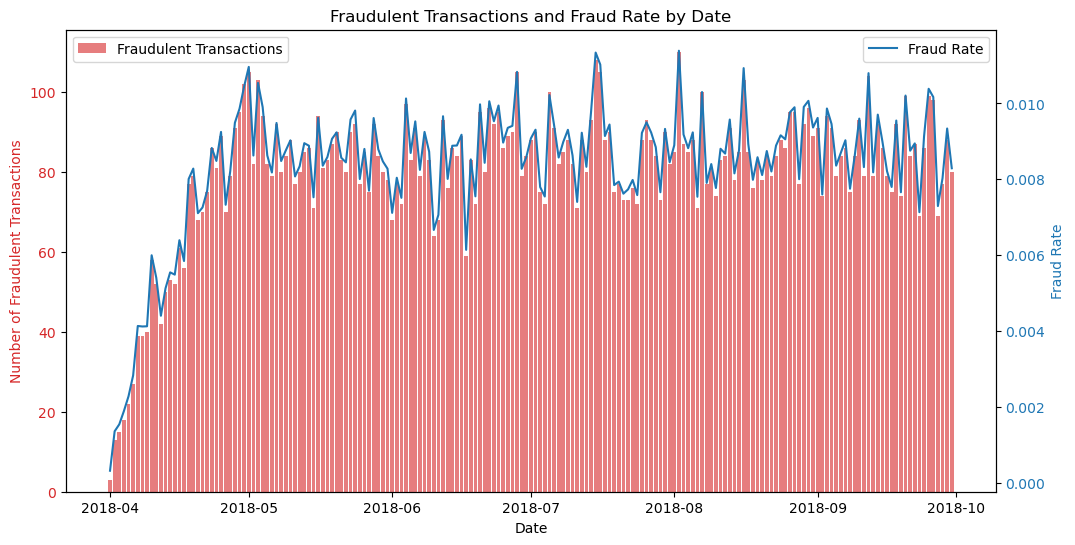

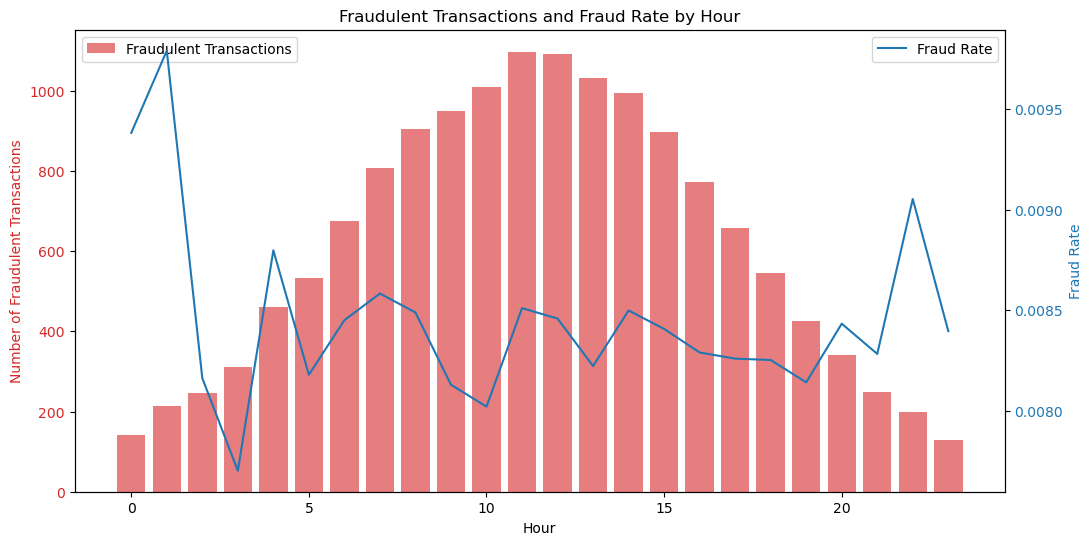

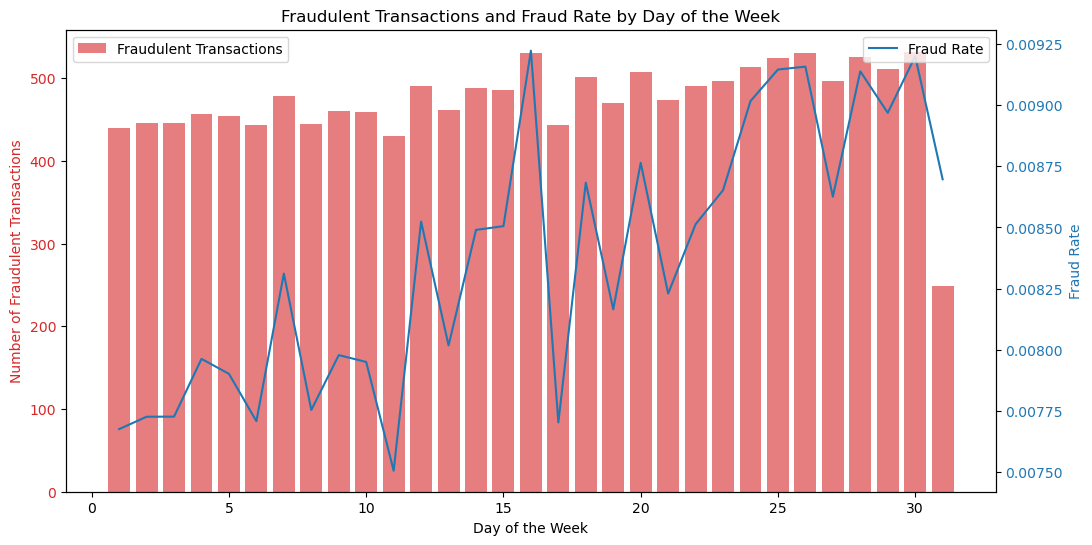

In [ ]:
import matplotlib.pyplot as plt

# Plot by Date
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Fraudulent Transactions', color=color)
ax1.bar(fraud_counts_by_date.index, fraud_counts_by_date, color=color, alpha=0.6, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraud Rate', color=color)
ax2.plot(fraud_rate_by_date.index, fraud_rate_by_date, color=color, label='Fraud Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Fraudulent Transactions and Fraud Rate by Date')
plt.show()

# Plot by Hour
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Fraudulent Transactions', color=color)
ax1.bar(fraud_counts_by_hour.index, fraud_counts_by_hour, color=color, alpha=0.6, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraud Rate', color=color)
ax2.plot(fraud_rate_by_hour.index, fraud_rate_by_hour, color=color, label='Fraud Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Fraudulent Transactions and Fraud Rate by Hour')
plt.show()

# Plot by Day of the Week
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Fraudulent Transactions', color=color)
ax1.bar(fraud_counts_by_day.index, fraud_counts_by_day, color=color, alpha=0.6, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraud Rate', color=color)
ax2.plot(fraud_rate_by_day.index, fraud_rate_by_day, color=color, label='Fraud Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Fraudulent Transactions and Fraud Rate by Day of the Week')
plt.show()


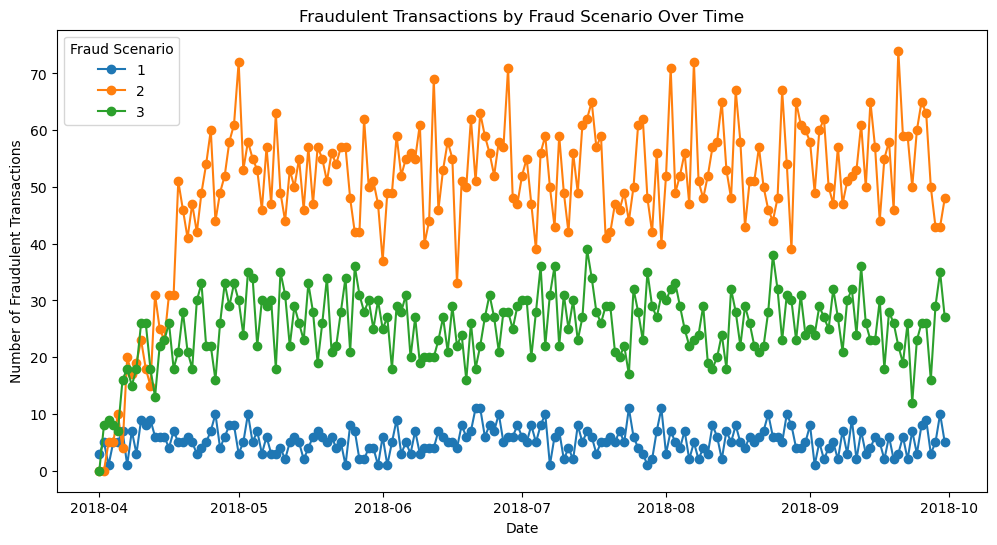

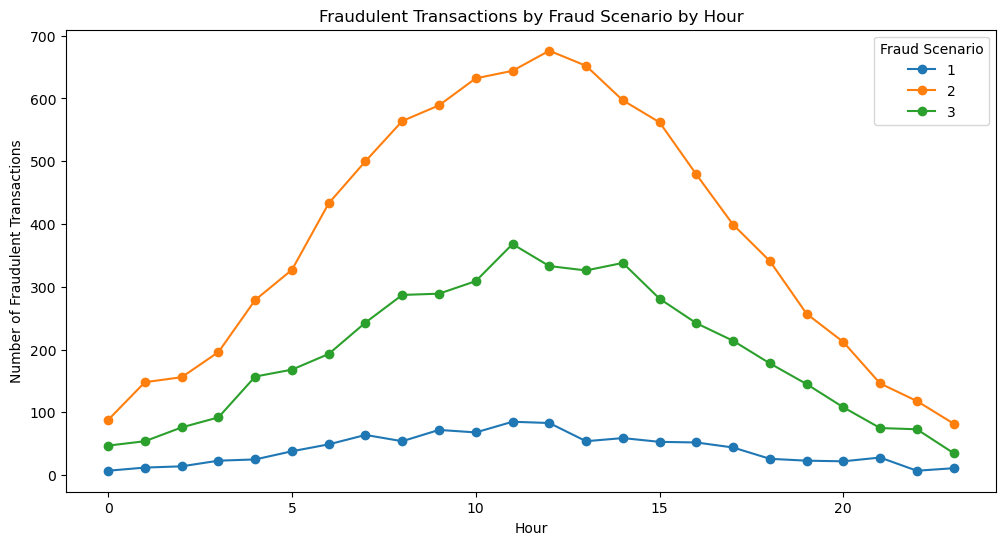

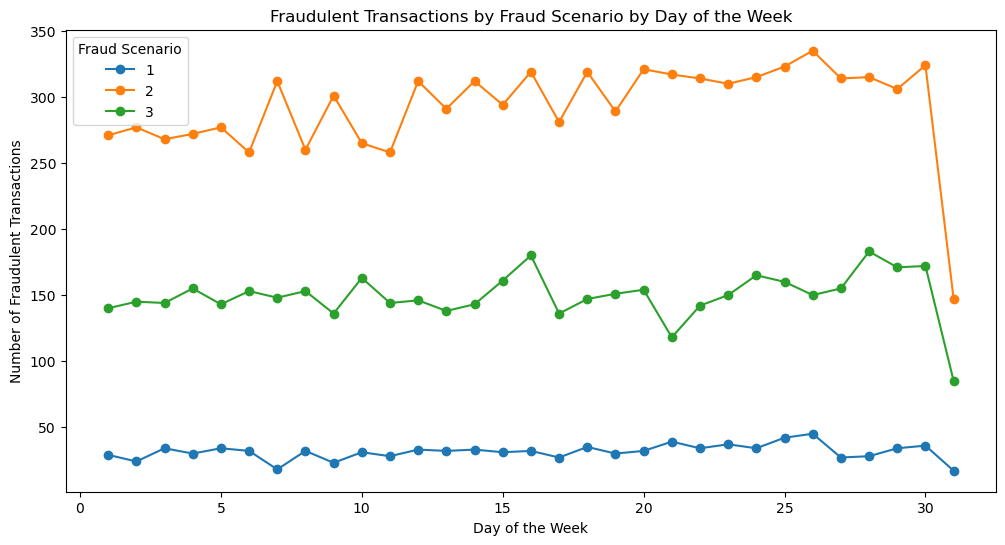

In [ ]:
# Aggregate fraudulent transactions by date and count occurrences of each fraud scenario
fraud_by_date = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby(['TX_DATE', 'TX_FRAUD_SCENARIO']).size().unstack(fill_value=0)

# Plot the distribution of each fraud scenario over time
fraud_by_date.plot(kind='line', figsize=(12,6), marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Fraud Scenario Over Time')
plt.legend(title='Fraud Scenario')
plt.show()

# Aggregate fraudulent transactions by hour and count occurrences of each fraud scenario
fraud_by_hour = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby(['TX_HOUR', 'TX_FRAUD_SCENARIO']).size().unstack(fill_value=0)

# Plot the distribution of each fraud scenario by hour
fraud_by_hour.plot(kind='line', figsize=(12, 6), marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Fraud Scenario by Hour')
plt.legend(title='Fraud Scenario')
plt.show()

# Aggregate fraudulent transactions by day of the week and count occurrences of each fraud scenario
fraud_by_day = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby(['TX_DAY', 'TX_FRAUD_SCENARIO']).size().unstack(fill_value=0)

# Plot the distribution of each fraud scenario by day of the week
fraud_by_day.plot(kind='line', figsize=(12, 6), marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Fraud Scenario by Day of the Week')
plt.legend(title='Fraud Scenario')
plt.show()


In [ ]:
transactions_df.head(3)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_HOUR,TX_DAY,TX_DATE
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,0,1,2018-04-01
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,0,1,2018-04-01
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,0,1,2018-04-01


In [ ]:

# Unique customers and terminals involved in fraudulent transactions
unique_fraud_customers = fraudulent_transactions['CUSTOMER_ID'].nunique()
unique_fraud_terminals = fraudulent_transactions['TERMINAL_ID'].nunique()

print(f"Number of unique customers involved in fraud: {unique_fraud_customers}")
print(f"Number of unique terminals involved in fraud: {unique_fraud_terminals}")


Number of unique customers involved in fraud: 4990
Number of unique terminals involved in fraud: 10000


In [ ]:
# Count of fraudulent transactions per customer
fraud_count_by_customer = fraudulent_transactions['CUSTOMER_ID'].value_counts()

# Count of fraudulent transactions per terminal
fraud_count_by_terminal = fraudulent_transactions['TERMINAL_ID'].value_counts()

print(fraud_count_by_customer.head())  # Display top customers by fraud count
print(fraud_count_by_terminal.head())  # Display top terminals by fraud count


CUSTOMER_ID
382     764
775     752
3864    751
1411    751
2932    743
Name: count, dtype: int64
TERMINAL_ID
4018    373
692     372
5295    366
8130    360
872     355
Name: count, dtype: int64


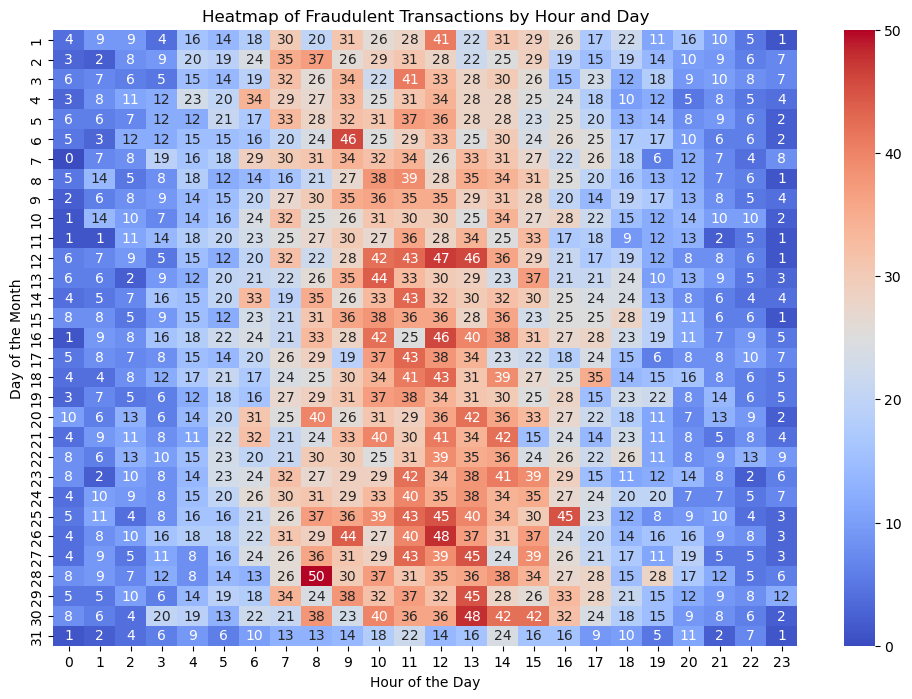

In [ ]:
import seaborn as sns

# Create a pivot table for heatmap
fraud_heatmap_data = transactions_df[transactions_df['TX_FRAUD'] == 1].pivot_table(index='TX_DAY', columns='TX_HOUR', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_heatmap_data, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Fraudulent Transactions by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.show()


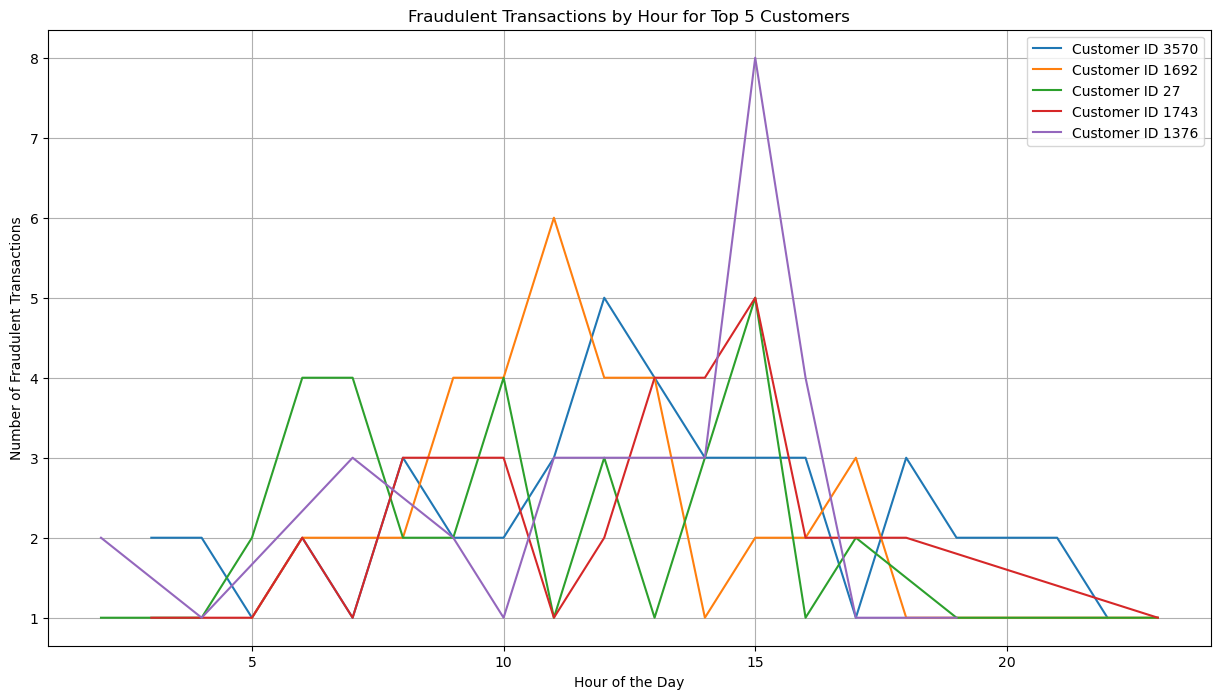

In [ ]:
top_customers = transactions_df[transactions_df['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
for customer in top_customers:
    fraud_counts_by_hour_customer = transactions_df[(transactions_df['TX_FRAUD'] == 1) & (transactions_df['CUSTOMER_ID'] == customer)].groupby('TX_HOUR').size()
    plt.plot(fraud_counts_by_hour_customer.index, fraud_counts_by_hour_customer, label=f'Customer ID {customer}')

plt.title('Fraudulent Transactions by Hour for Top 5 Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()


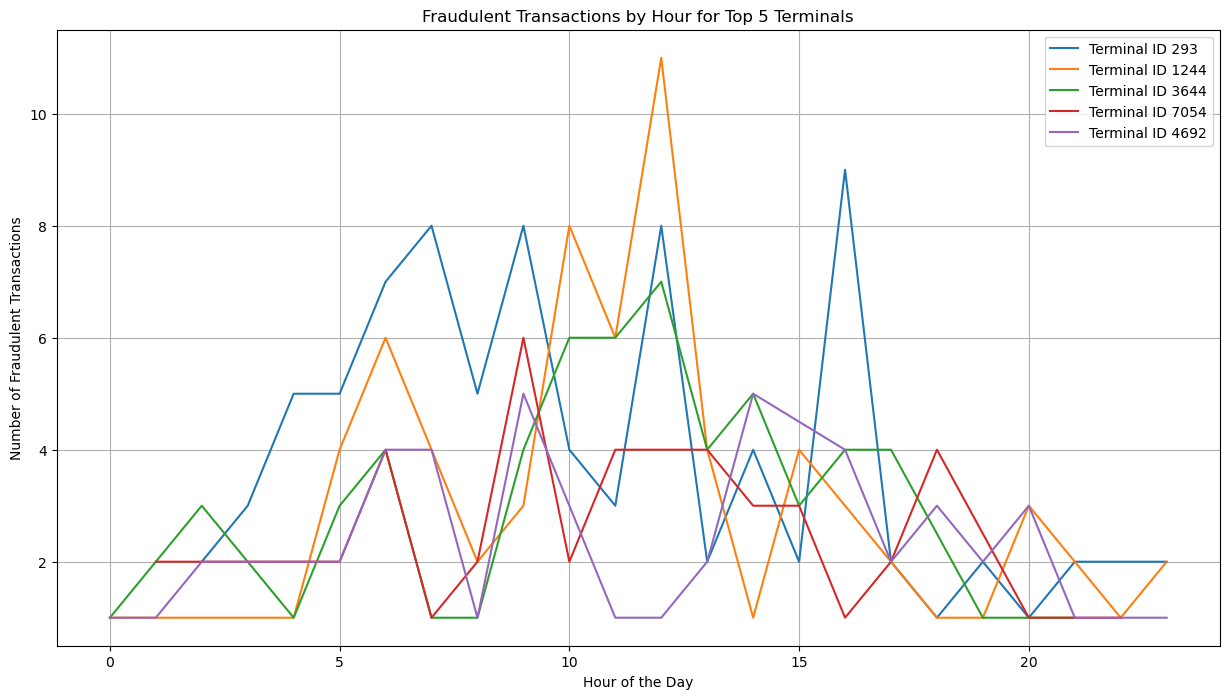

In [ ]:
top_terminals = transactions_df[transactions_df['TX_FRAUD'] == 1]['TERMINAL_ID'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
for terminal in top_terminals:
    fraud_counts_by_hour_terminal = transactions_df[(transactions_df['TX_FRAUD'] == 1) & (transactions_df['TERMINAL_ID'] == terminal)].groupby('TX_HOUR').size()
    plt.plot(fraud_counts_by_hour_terminal.index, fraud_counts_by_hour_terminal, label=f'Terminal ID {terminal}')

plt.title('Fraudulent Transactions by Hour for Top 5 Terminals')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()


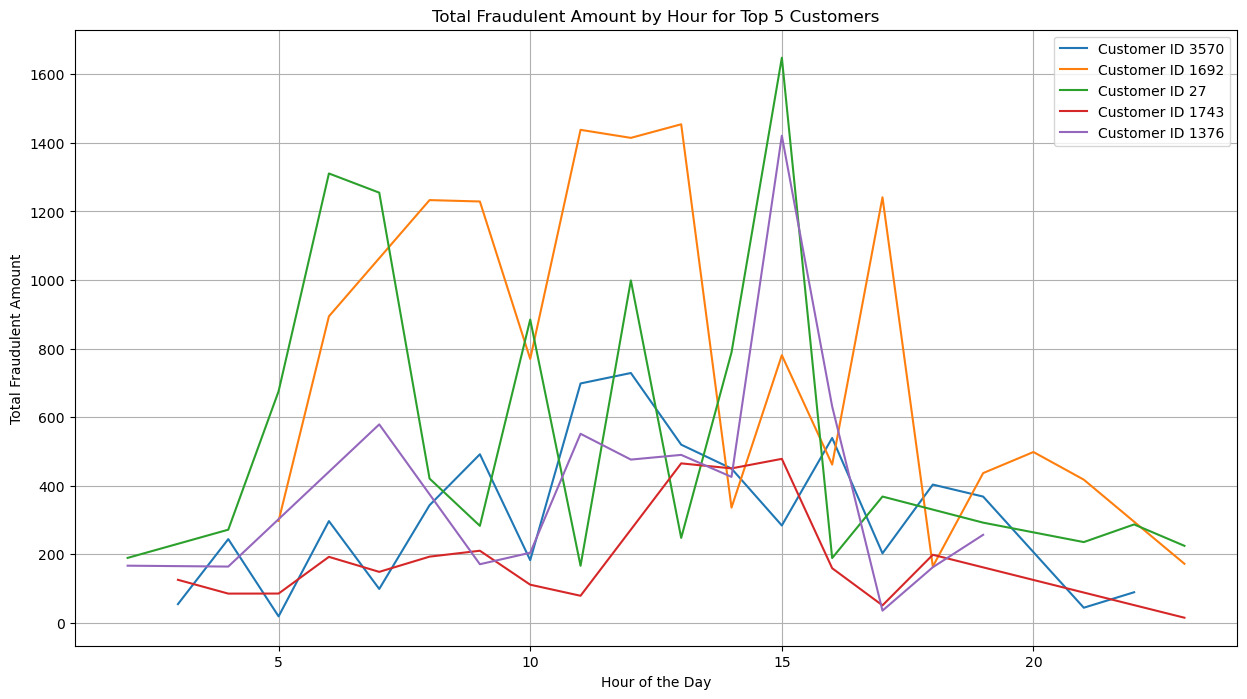

In [ ]:
top_customers = transactions_df[transactions_df['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts().head(5).index
top_terminals = transactions_df[transactions_df['TX_FRAUD'] == 1]['TERMINAL_ID'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
for customer in top_customers:
    fraud_amount_by_hour_customer = transactions_df[(transactions_df['TX_FRAUD'] == 1) & (transactions_df['CUSTOMER_ID'] == customer)].groupby('TX_HOUR')['TX_AMOUNT'].sum()
    plt.plot(fraud_amount_by_hour_customer.index, fraud_amount_by_hour_customer, label=f'Customer ID {customer}')

plt.title('Total Fraudulent Amount by Hour for Top 5 Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Fraudulent Amount')
plt.legend()
plt.grid(True)
plt.show()


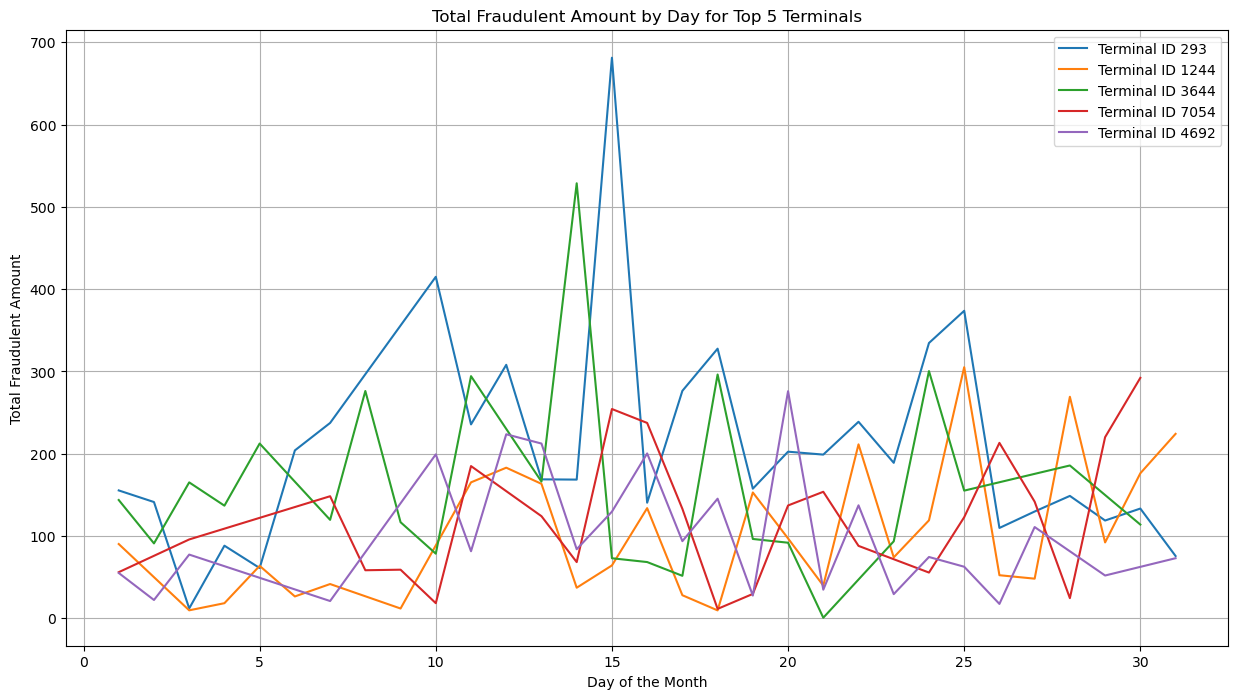

In [ ]:
plt.figure(figsize=(15, 8))
for terminal in top_terminals:
    fraud_amount_by_day_terminal = transactions_df[(transactions_df['TX_FRAUD'] == 1) & (transactions_df['TERMINAL_ID'] == terminal)].groupby('TX_DAY')['TX_AMOUNT'].sum()
    plt.plot(fraud_amount_by_day_terminal.index, fraud_amount_by_day_terminal, label=f'Terminal ID {terminal}')

plt.title('Total Fraudulent Amount by Day for Top 5 Terminals')
plt.xlabel('Day of the Month')
plt.ylabel('Total Fraudulent Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
customer_terminal_pairs = transactions_df.groupby(['CUSTOMER_ID', 'TERMINAL_ID']).size()
top_customer_terminal_pairs = customer_terminal_pairs.sort_values(ascending=False).head(10)

print(top_customer_terminal_pairs)


CUSTOMER_ID  TERMINAL_ID
964          8889           36
             9731           36
4877         7566           36
964          1774           34
4877         9721           33
964          1939           33
4877         9422           33
4820         6153           31
964          3411           31
4877         3634           31
dtype: int64


In [ ]:
fraudulent_amount_by_pair = transactions_df[transactions_df['TX_FRAUD'] == 1].groupby(['CUSTOMER_ID', 'TERMINAL_ID'])['TX_AMOUNT'].sum()
top_fraudulent_amount_by_pair = fraudulent_amount_by_pair.sort_values(ascending=False).head(10)

print(top_fraudulent_amount_by_pair)


CUSTOMER_ID  TERMINAL_ID
1843         505            2901.15
3280         6934           2861.00
1843         4816           2628.00
3880         6316           1815.75
3663         4736           1528.40
4955         2859           1451.35
2780         3779           1318.45
1265         5197           1302.95
3343         7549           1265.65
3078         2674           1263.40
Name: TX_AMOUNT, dtype: float64


In [ ]:
df.head(2)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1744506,1744506,2018-09-30 00:00:01,4423,7637,12.29,15724801,182,0,0
1744507,1744507,2018-09-30 00:00:27,3680,5369,222.32,15724827,182,1,1


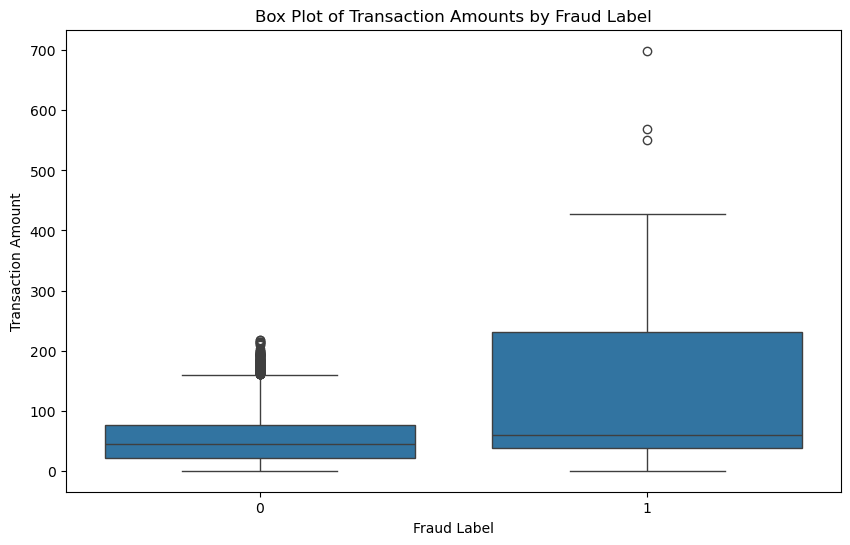

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=df)
plt.title('Box Plot of Transaction Amounts by Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')
plt.show()